Time Series Forecasting means analyzing and modeling time-series data to make future decisions. Some of the applications of Time Series Forecasting are weather forecasting, sales forecasting, business forecasting, stock price forecasting, etc. The ARIMA model is a popular statistical technique used for Time Series Forecasting. 


## What is ARIMA?

ARIMA stands for Autoregressive Integrated Moving Average. It is an algorithm used for forecasting Time Series Data. ARIMA models have three parameters like ARIMA(p, d, q). Here p, d, and q are defined as:

1. p is the number of lagged values that need to be added or subtracted from the values (label column). It captures the autoregressive part of ARIMA.
2. d represents the number of times the data needs to differentiate to produce a stationary signal. If it’s stationary data, the value of d should be 0, and if it’s seasonal data, the value of d should be 1. d captures the integrated part of ARIMA.
3. q is the number of lagged values for the error term added or subtracted from the values (label column). It captures the moving average part of ARIMA.

Now, the task of Time Series Forecasting of stock prices with ARIMA using the Python programming language.

## Time Series Forecasting with ARIMA

Now let’s start with the task of Time Series Forecasting with ARIMA. First collect Google stock price data using the Yahoo Finance API. 

Now here’s how to collect data about the Google’s Stock Price:

In [1]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

          Date        Open        High         Low       Close   Adj Close  \
246 2023-04-14  107.690002  109.580002  107.589996  109.459999  109.459999   
247 2023-04-17  105.430000  106.709999  105.320000  106.419998  106.419998   
248 2023-04-18  107.000000  107.050003  104.779999  105.120003  105.120003   
249 2023-04-19  104.214996  105.724998  103.800003  105.019997  105.019997   
250 2023-04-20  104.650002  106.888000  104.639999  105.900002  105.900002   

       Volume  
246  20745400  
247  29043400  
248  17641400  
249  16732000  
250  22496300  


We only need the date and close prices columns for the rest of the task, so let’s select both the columns and move further:

In [2]:
data = data[["Date", "Close"]]
print(data.head())

        Date       Close
0 2022-04-21  124.937500
1 2022-04-22  119.613998
2 2022-04-25  123.250000
3 2022-04-26  119.505997
4 2022-04-27  115.020500


Now let’s visualize the close prices of Google before moving forward:

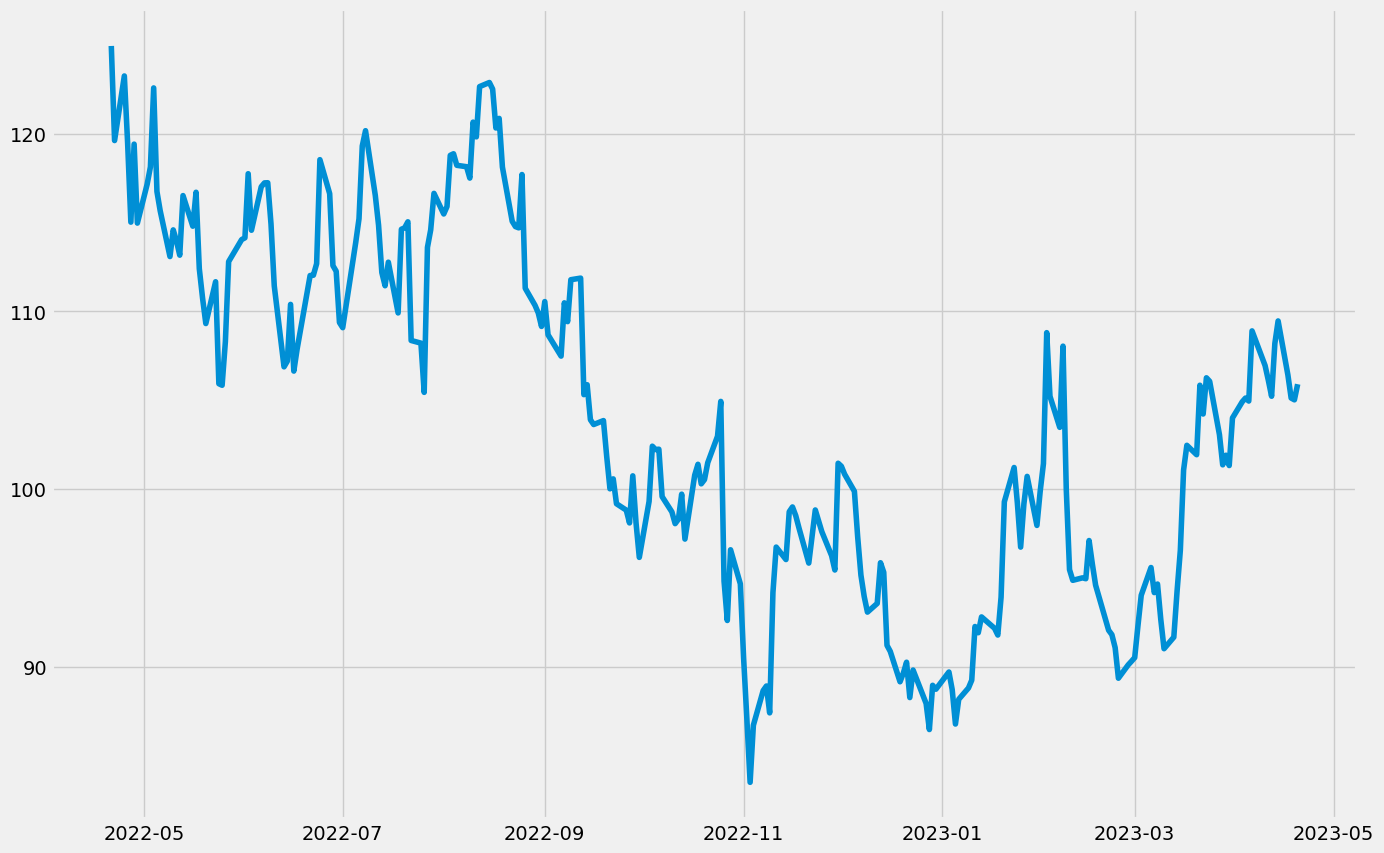

In [4]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

## Using ARIMA for Time Series Forecasting

Before using the ARIMA model, we have to figure out whether our data is stationary or seasonal. The data visualization graph about the closing stock prices above shows that our dataset is not stationary. To check whether our dataset is stationary or seasonal properly, we can use the seasonal decomposition method that splits the time series data into trend, seasonal, and residuals for a better understanding of the time series data:

<Figure size 640x480 with 0 Axes>

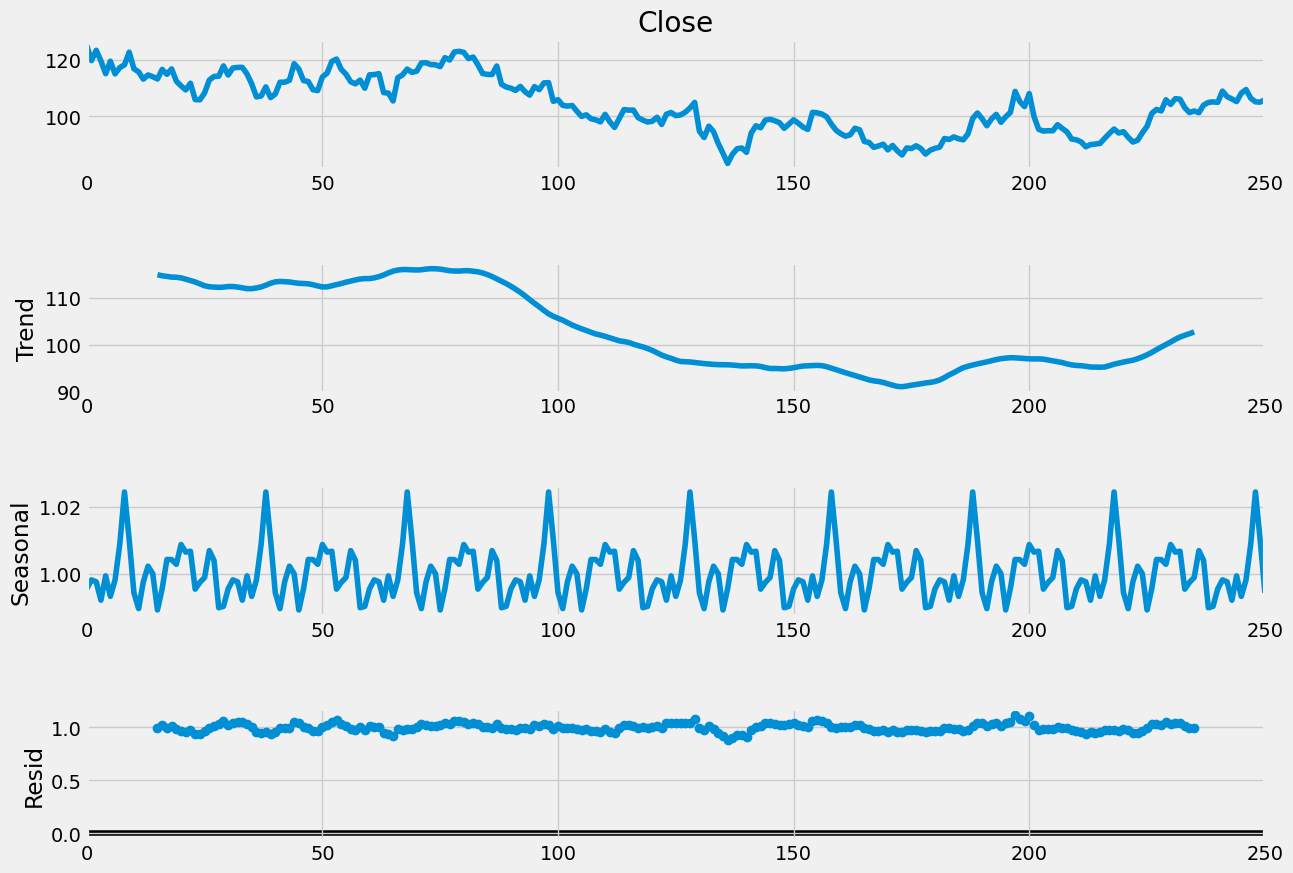

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], 
                            model='multiplicative', p = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

So our data is not stationary it is seasonal. We need to use the Seasonal ARIMA (SARIMA) model for Time Series Forecasting on this data. But before using the SARIMA model, we will use the ARIMA model. It will help you learn using both models.

To use ARIMA or SARIMA, we need to find the p, d, and q values. We can find the value of p by plotting the autocorrelation of the Close column and the value of q by plotting the partial autocorrelation plot. The value of d is either 0 or 1. If the data is stationary, we should use 0, and if the data is seasonal, we should use 1. As our data is seasonal, we should use 1 as the d value.

Now here’s how to find the value of p:

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

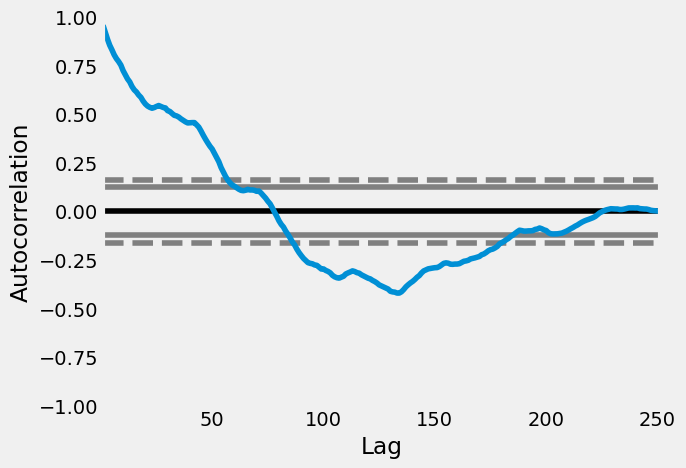

In [8]:
pd.plotting.autocorrelation_plot(data["Close"])

In the above autocorrelation plot, the curve is moving down after the 5th line of the first boundary. That is how to decide the p-value. Hence the value of p is 5. Now let’s find the value of q (moving average):

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


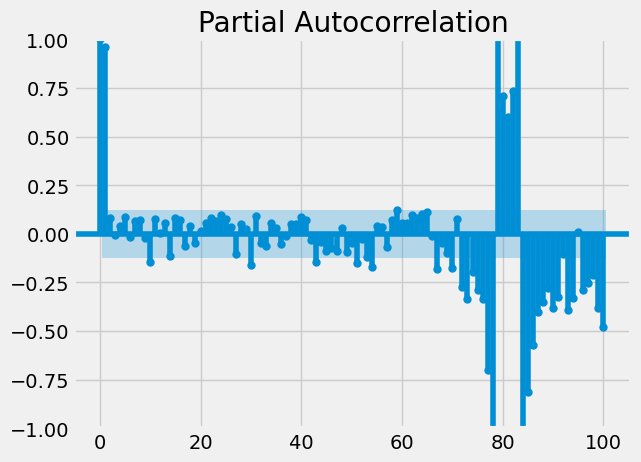

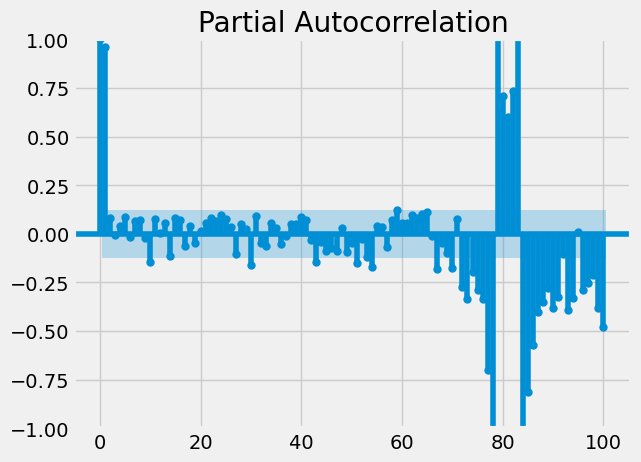

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In the above partial autocorrelation plot, we can see that only two points are far away from all the points. That is how to decide the q value. Hence the value of q is 2. Now let’s build an ARIMA model:

In [12]:
p, d, q = 5, 1, 2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data["Close"], order=(p,d,q))
# Fit the model
fitted = model.fit()
# Set the display option
fitted.params['disp'] = -1
# Print the summary
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -593.902
Date:                Fri, 21 Apr 2023   AIC                           1203.803
Time:                        18:03:38   BIC                           1231.975
Sample:                             0   HQIC                          1215.141
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1235      0.149     -0.829      0.407      -0.416       0.169
ar.L2          0.8353      0.164      5.092      0.000       0.514       1.157
ar.L3          0.0200      0.084      0.239      0.8

Here’s how to predict the values using the ARIMA model:

In [13]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1      124.937453
2      119.904242
3      123.318759
4      119.662524
          ...    
246    107.831779
247    108.936302
248    106.311232
249    104.985606
250    104.933320
Name: predicted_mean, Length: 251, dtype: float64


The predicted values are wrong because the data is seasonal. ARIMA model will never perform well on seasonal time series data. So, here’s how to build a SARIMA model:

In [15]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -583.012
Date:                            Fri, 21 Apr 2023   AIC                           1196.025
Time:                                    18:04:40   BIC                           1248.109
Sample:                                         0   HQIC                          1217.016
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0108      1.857      0.006      0.995      -3.628       3.650
ar.L2          0.3194      1.293   

Now let’s predict the future stock prices using the SARIMA model for the next 10 days:



In [16]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

251    105.417820
252    106.087963
253    106.563822
254    106.716878
255    105.767398
256    105.065874
257    104.521256
258    104.941407
259    105.328100
260    106.120100
261    106.459838
Name: predicted_mean, dtype: float64


Here’s how you can plot the predictions:



<AxesSubplot:>

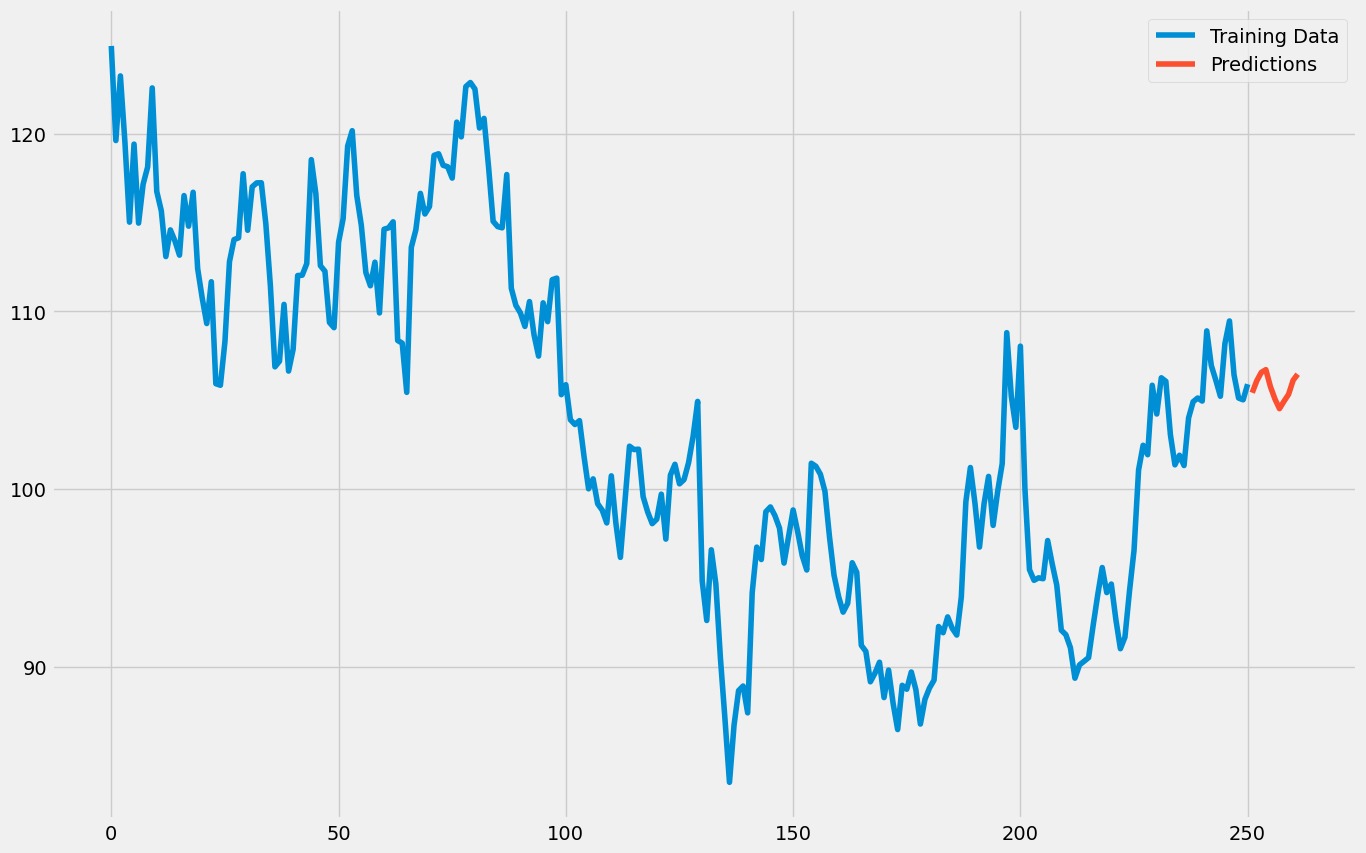

In [17]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

So this is how you can use ARIMA or SARIMA models for Time Series Forecasting using Python.

## Summary
ARIMA stands for Autoregressive Integrated Moving Average. It is an algorithm used for forecasting Time Series Data. If the data is stationary, we need to use ARIMA, if the data is seasonal, we need to use Seasonal ARIMA (SARIMA).